Name: SUKITH DE SILVA <br>
Subject : Data Science Bootcamp SLASSCOM <br>
Exam: Assignment 01

<h1> Heart Disease Prediction

<h2> Data Exploration

Import required python libraries

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Descreption of Data Set </h3>

In [137]:
# Load the UCI Wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 
         'fbs', 'restecg', 'thalach', 'exang',
         'oldpeak', 'slope', 'ca', 'thal','num']
Heart_data = pd.read_csv(url, names=names)

In [138]:
Heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [139]:
Heart_data.shape

(303, 14)

input varaibles/Independent variables <br>

age: The person age in years <br>
sex: The person sex (1 = male, 0 = female) <br>
cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic) <br>
trestbps: The person resting blood pressure (mm Hg on admission to the hospital)<br>
chol: The person cholesterol measurement in mg/dl<br>
fbs: The person  fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)<br>
restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes criteria)<br>
thalach: The person maximum heart rate achieved<br>
exang: Exercise induced angina (1 = yes; 0 = no)<br>
oldpeak: ST depression induced by exercise relative to rest <br>
slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)<br>
ca: The number of major vessels (0-3)<br>
thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)<br>
                                                                                         
Target Variable       <br>                                            
num: (0-4) based on reasearches we can assigned<br>
(0: Absence of heart disease)<br>
1: Presence of heart disease (value 1-4 indicates increasing severity)  <br>                            

In [140]:
Heart_data['num'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [141]:
Heart_data['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [142]:
Heart_data['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [143]:
# remove rows which '?' values in ca & thal
Heart_data = Heart_data[Heart_data['ca'] != '?']

In [144]:
Heart_data['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [145]:
Heart_data = Heart_data[Heart_data['thal'] != '?']

In [146]:
Heart_data['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [147]:
#convert num(target column into binary values bases on above condition and 
# change the column name into target and drop the num column

Heart_data['target'] = np.where(Heart_data['num'] > 0, 1, 0)

Heart_data = Heart_data.drop('num', axis=1)

In [148]:
Heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [155]:
Heart_data.shape

(297, 14)

Heart data set include 303 instances and 13 independent variables and 1 dependent variable


In [156]:
# validates data types
Heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  target    297 non-null    int32  
dtypes: float64(11), int32(1), object(2)
memory usage: 33.6+ KB


In [157]:
#checking null values
Heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In the Heart data set there is not missing values included.Hence we do not need to apply any imputation method for this data set

In [158]:
Heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


Catogorical Varaibles <br>

sex <br>
cp <br>
fbs <br>
restecg <br>
exang <br>
slope <br>
target (dependent varable) <br>

Numeric Varaibles <br>

age<br>
trestbps<br>
chol<br>
thalach<br>
oldpeak<br>


In [159]:
# Make a copy of the original dataframe
Heart_data_modified = Heart_data.copy()

In [160]:
Heart_data_modified['sex'] = Heart_data_modified['sex'].astype('object')
Heart_data_modified['cp'] = Heart_data_modified['cp'].astype('object')
Heart_data_modified['fbs'] = Heart_data_modified['fbs'].astype('object')
Heart_data_modified['restecg'] = Heart_data_modified['restecg'].astype('object')
Heart_data_modified['exang'] = Heart_data_modified['exang'].astype('object')
Heart_data_modified['slope'] = Heart_data_modified['slope'].astype('object')
Heart_data_modified['target'] = Heart_data_modified['target'].astype('object')

In [161]:
# Replace categorical variables with thier class values /Data Encoding
Heart_data_modified['sex'] = Heart_data_modified['sex'].replace({1: 'male', 0:'female'})
Heart_data_modified['cp'] = Heart_data_modified['cp'].replace({1: 'typical angina', 2:'atypical angina',3: 'non-anginal pain', 4:'asymptomatic'})
Heart_data_modified['fbs'] = Heart_data_modified['fbs'].replace({0: 'lower than 120mg/ml', 1:'greater than 120mg/ml'})
Heart_data_modified['restecg'] = Heart_data_modified['restecg'].replace({0: 'normal', 1:'ST-T wave abnormality',2:'left ventricular hypertrophy'})
Heart_data_modified['exang'] = Heart_data_modified['exang'].replace({0: 'no', 1:'yes'})
Heart_data_modified['slope'] = Heart_data_modified['slope'].replace({1: 'upsloping', 2:'flat',3:'downsloping'})
Heart_data_modified['target'] = Heart_data_modified['target'].replace({0: 'No', 1:'yes'})


In [162]:
Heart_data_modified.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,male,typical angina,145.0,233.0,greater than 120mg/ml,left ventricular hypertrophy,150.0,no,2.3,downsloping,0.0,6.0,No
1,67.0,male,asymptomatic,160.0,286.0,lower than 120mg/ml,left ventricular hypertrophy,108.0,yes,1.5,flat,3.0,3.0,yes
2,67.0,male,asymptomatic,120.0,229.0,lower than 120mg/ml,left ventricular hypertrophy,129.0,yes,2.6,flat,2.0,7.0,yes
3,37.0,male,non-anginal pain,130.0,250.0,lower than 120mg/ml,normal,187.0,no,3.5,downsloping,0.0,3.0,No
4,41.0,female,atypical angina,130.0,204.0,lower than 120mg/ml,left ventricular hypertrophy,172.0,no,1.4,upsloping,0.0,3.0,No


<h2> Exploratory Data Analysis

<AxesSubplot:xlabel='target', ylabel='count'>

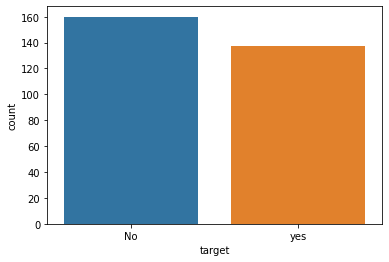

In [163]:
sns.countplot(x='target',data=Heart_data_modified)

According to countpotpot graph the number of observations in each target(dependent varaible) is evenly distributed.So this can be conclude as balance class

Text(0.5, 1.0, 'Gender v/s target\n')

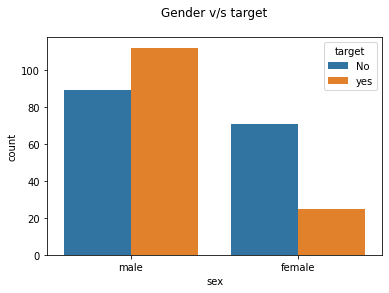

In [164]:
sns.countplot(data= Heart_data_modified, x=Heart_data_modified['sex'],hue='target')
plt.title('Gender v/s target\n')

According to Gender vs target plot we can identify more males are positive for having heart diseases

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

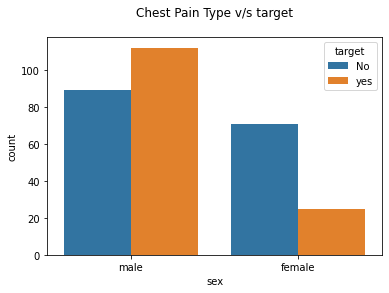

In [165]:
sns.countplot(data= Heart_data_modified, x=Heart_data_modified['sex'],hue='target')
plt.title('Chest Pain Type v/s target\n')

There are four types of chest pain, asymptomatic, atypical angina, non-anginal pain and typical angina. Most of the Heart Disease patients are found to have asymptomatic chest pain.

Text(0.5, 1.0, 'Slope v/s Target\n')

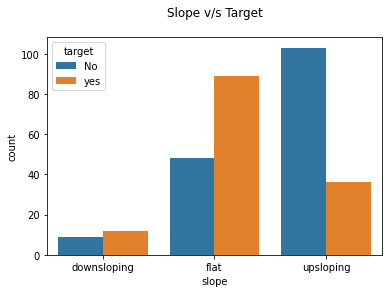

In [166]:
sns.countplot(data= Heart_data_modified, x='slope',hue='target')
plt.title('Slope v/s Target\n')

Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

<Figure size 1152x504 with 0 Axes>

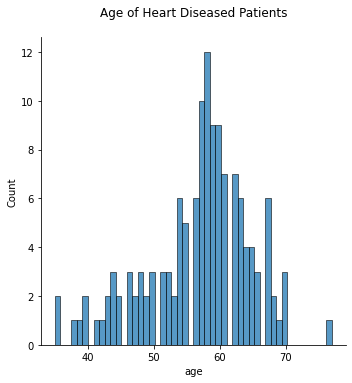

In [167]:
plt.figure(figsize=(16,7))
sns.displot(Heart_data[Heart_data['target']==1]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

Heart Disease is very common in the seniors which is composed of age group 60 and above and common among adults which belong to the age group of 50 to 60. But it’s rare among the age group of 19 to 40 and very rare among the age group of 0 to 18.

Text(0.5, 1.0, 'Chol of Heart Diseased Patients\n')

<Figure size 1152x504 with 0 Axes>

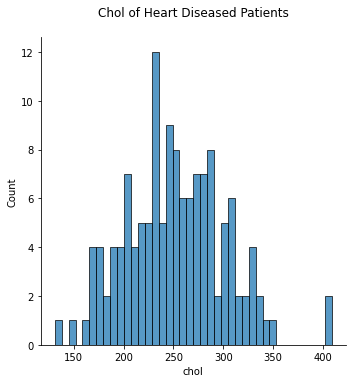

In [168]:
plt.figure(figsize=(16,7))
sns.displot(Heart_data[Heart_data['target']==1]['chol'],kde=False,bins=40)
plt.title('Chol of Heart Diseased Patients\n')

Age vs trestbps(Heart Diseased Patinets)


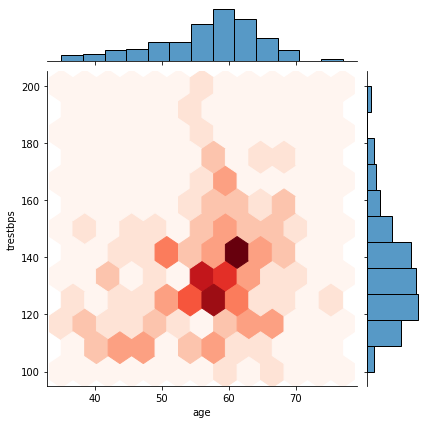

In [169]:
df3 = Heart_data_modified[Heart_data_modified['target'] == 'yes' ][['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']] 
#target yes - people with heart disease

pal = sns.light_palette("blue", as_cmap=True)

print('Age vs trestbps(Heart Diseased Patinets)')
sns.jointplot(data=df3,
              x='age',
              y='trestbps',
              kind='hex',
              cmap='Reds'
           
              )

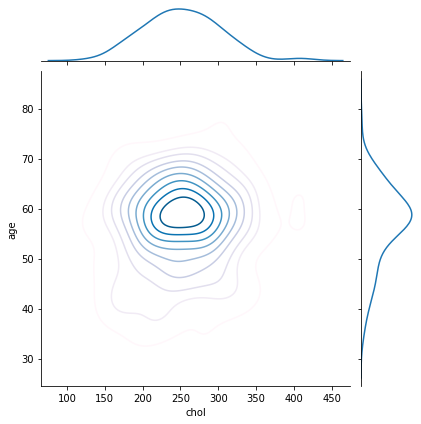

In [170]:
sns.jointplot(data=df3,
              x='chol',
              y='age',
              kind='kde',
              cmap='PuBu'
              )

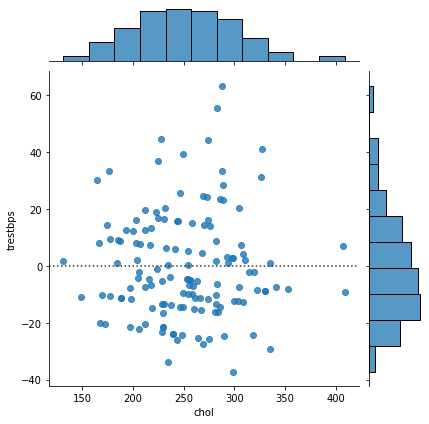

In [171]:
sns.jointplot(data=df3,
              x='chol',
              y='trestbps',
              kind='resid',
             
              )

Joint plots in seaborn helps us to understand the trend seen among two features. As observed from the above plot we can see that most of the Heart diseased patients in their age of upper 50s or lower 60s tend to have Cholesterol between 200mg/dl to 300mg/dl.

<AxesSubplot:xlabel='target', ylabel='age'>

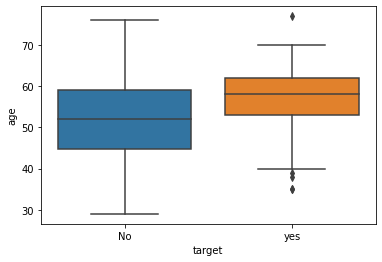

In [172]:
sns.boxplot(data=Heart_data_modified,x='target',y='age')

<AxesSubplot:xlabel='fbs', ylabel='trestbps'>

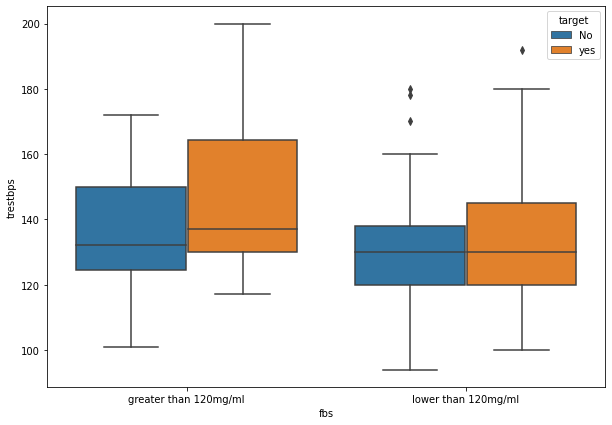

In [173]:
plt.figure(figsize=(10,7))
sns.boxplot(data=Heart_data_modified,x='fbs',y='trestbps',hue='target')

<AxesSubplot:xlabel='thal', ylabel='oldpeak'>

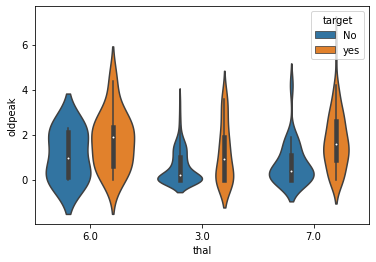

In [174]:
sns.violinplot(data=Heart_data_modified,x='thal',y='oldpeak',hue='target')

<AxesSubplot:xlabel='cp', ylabel='thalach'>

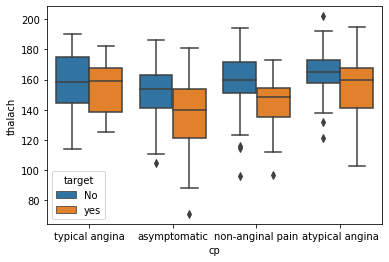

In [182]:
sns.boxplot(data=Heart_data_modified,x='cp',y='thalach',hue='target')

<AxesSubplot:xlabel='fbs', ylabel='trestbps'>

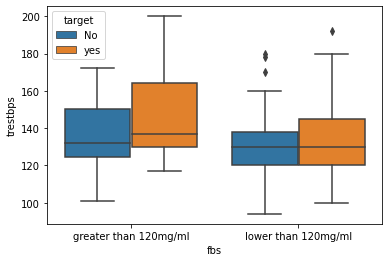

In [184]:

sns.boxplot(data=Heart_data_modified,x='fbs',y='trestbps',hue='target')

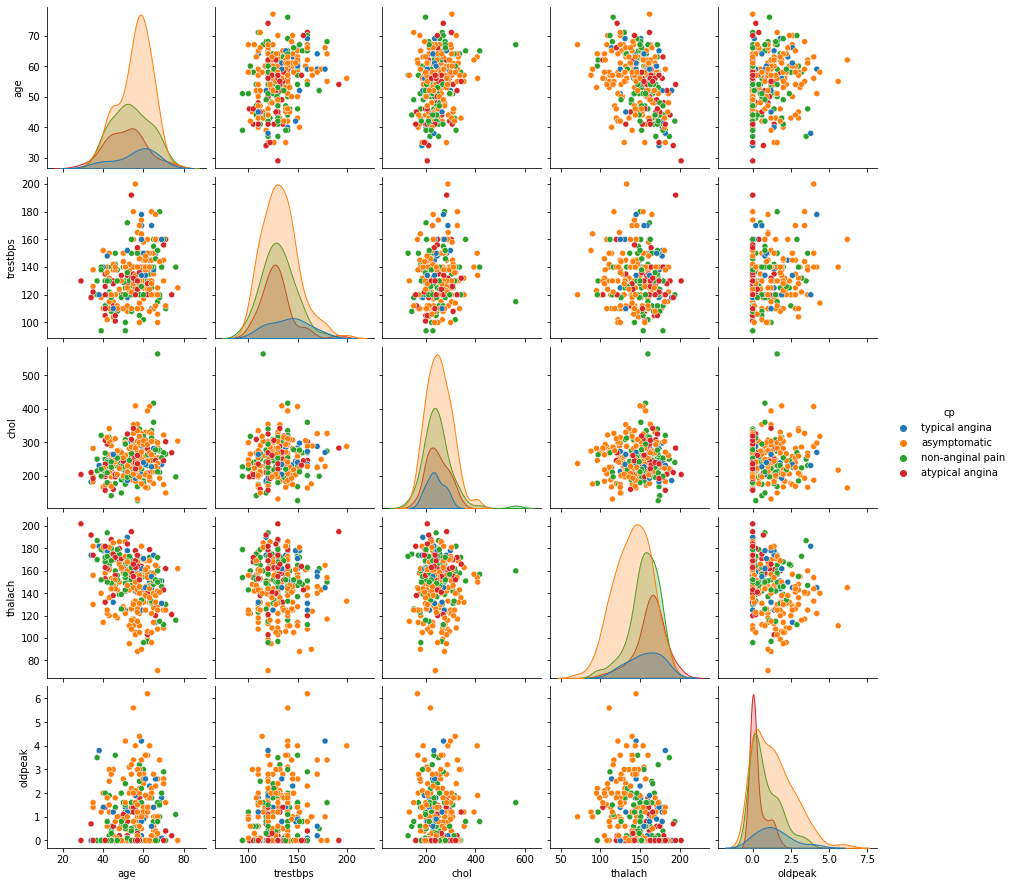

In [175]:
sns.pairplot(Heart_data_modified,hue='cp')

<AxesSubplot:>

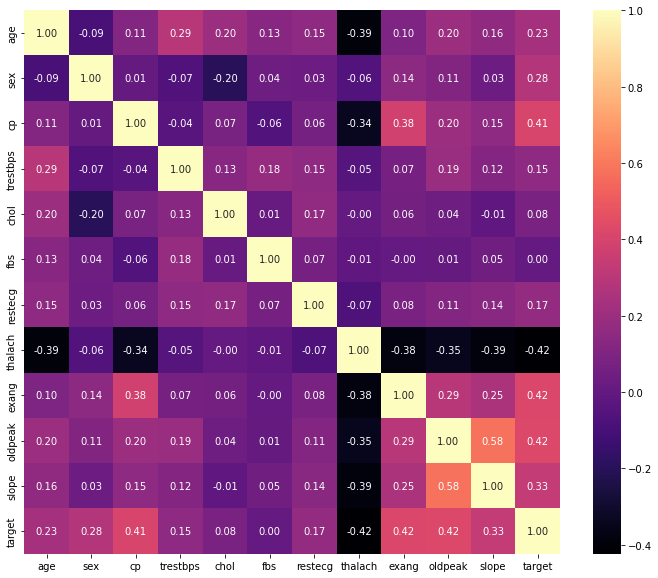

In [176]:
# plot correlation plot to identify correlation between variables

plt.figure(figsize=(12,10))
sns.heatmap(Heart_data.corr(),annot=True,cmap="magma",fmt='.2f')

Correlation shows whether the characteristics are related to each other or to the target variable. Correlation can be positive (increase in one value, the value of the objective variable increases) or negative (increase in one value, the value of the target variable decreased). From this heatmap we can observe that the ‘cp’ chest pain is highly related to the target variable. 

<h2>can use logistics regression model to predict the heart disease ?

Yes, logistic regression can be applied to the  Heart Disease dataset for binary classification tasks.Here dependent variable 'num' is converted into binary values (0: Absence of heart disease) & 1: Presence of heart disease (value 1-4 indicates increasing severity).Using Logistic regression algorithm used for binary classification we can predict the out come whether patient has hear disease or not.


In [177]:
# applying Logistic regression for the hear disease data set

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [178]:
# Separate the features and the target variable
X = Heart_data.drop('target', axis=1)
y = Heart_data['target']


In [179]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [180]:
# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)



C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)